<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/branch_Dhairya/MIE1624Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The code below deletes the current runtime of this notebook, 
# so the following code cells will not be compiled even if you do "Runtime>Run all"
# Alternate suggestion: Use "Runtime>Run after"
# The purpose of this implementation is to have a fresh clone of our github repo
# everytime we run the notebook as our current working directory
from google.colab import runtime
runtime.unassign()

# Setting up the Notebook

In [1]:
# cloning our Project Repo
! git clone --single-branch --branch branch_Dhairya https://github.com/farhanwadia/nlp_g14.git

Cloning into 'nlp_g14'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (34/34), 93.11 KiB | 1.00 MiB/s, done.


In [2]:
# changing the current directory to our Project Repo "nlp_g14", if not already done
%cd nlp_g14

/content/nlp_g14


In [3]:
# checking the contents of our current directory
! ls

MIE1624Project.ipynb  README.md


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=e613d36ae6d581a7d01c806244ec50522a72aabfc9901080a9805e94326d2e0d
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


# Importing Training Data

In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time

In [ ]:
# importing the twitter training data provided to us in "sentiment_analysis.csv" 
# file as a pandas dataframe
df = pd.read_csv('sentiment_analysis.csv')
df

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
# we do not need the "ID" column for our sentiment analysis so let's drop that
df.drop(columns = ['ID'], inplace = True)
df.head()

,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


In [ ]:
df.drop_duplicates(subset='text',inplace=True)
df

,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...
550386,@goddesses_o I can't stop watching her...mm. M...,0
550387,Poor old Tom Odell doesn't look like he would ...,0
550388,#antsmasher I smashed 7 ants in this awesome ...,1
550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(tweet):
  try:
    return detect(tweet)
  except:
    return None

df['language'] = df['text'].apply(detect_language)
df

,text,label,language
0,Josh Jenkins is looking forward to TAB Breeder...,1,en
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,en
2,"RT @PEPalerts: This September, @YESmag is taki...",1,en
3,"RT @david_gaibis: Newly painted walls, thanks ...",1,en
4,RT @CedricFeschotte: Excited to announce: as o...,1,en
...,...,...,...
550386,@goddesses_o I can't stop watching her...mm. M...,0,en
550387,Poor old Tom Odell doesn't look like he would ...,0,en
550388,#antsmasher I smashed 7 ants in this awesome ...,1,en
550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,en


In [ ]:
df = df[df['language'] == 'en']
df

,text,label,language
0,Josh Jenkins is looking forward to TAB Breeder...,1,en
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,en
2,"RT @PEPalerts: This September, @YESmag is taki...",1,en
3,"RT @david_gaibis: Newly painted walls, thanks ...",1,en
4,RT @CedricFeschotte: Excited to announce: as o...,1,en
...,...,...,...
550386,@goddesses_o I can't stop watching her...mm. M...,0,en
550387,Poor old Tom Odell doesn't look like he would ...,0,en
550388,#antsmasher I smashed 7 ants in this awesome ...,1,en
550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,en


In [ ]:
df.to_csv('sentiment_analysis(eng_filtered).csv')

# Check Point

In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
df

,Unnamed: 0,text,label,language
0,0,Josh Jenkins is looking forward to TAB Breeder...,1,en
1,1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,en
2,2,"RT @PEPalerts: This September, @YESmag is taki...",1,en
3,3,"RT @david_gaibis: Newly painted walls, thanks ...",1,en
4,4,RT @CedricFeschotte: Excited to announce: as o...,1,en
...,...,...,...,...
473942,550386,@goddesses_o I can't stop watching her...mm. M...,0,en
473943,550387,Poor old Tom Odell doesn't look like he would ...,0,en
473944,550388,#antsmasher I smashed 7 ants in this awesome ...,1,en
473945,550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,en


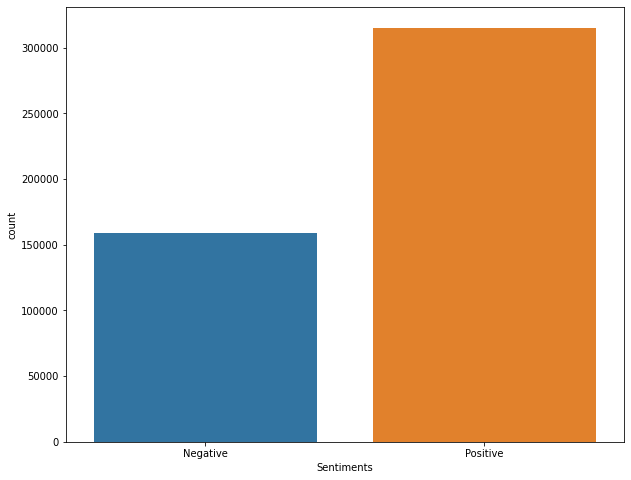

In [ ]:
# let's look at the distribution of our classes ({0: 'Negative}, {1: 'Positive'})
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = df['label'])
x_labels = ['Negative', 'Positive']
ax.set_xticklabels(x_labels)
plt.xlabel('Sentiments')
plt.show()

As of now our data set is unbalanced with more positive tweets than negative tweets. Moreover the sheer amount of tweets we have is too much (~ 500,000), training models with this much data will be very slow. The following cell selects equal number (5000) of random positive and negative tweets to form a balanced dataset of 10,000 tweets

In [ ]:
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000))
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000))
idx = np.concatenate((negative_idx, positive_idx))
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1)
ttr_data

,text,label,language
0,The #Celtics season hasn't started off the way...,0,en
1,And the case for God from our yearning has a m...,0,en
2,what the fuck minseok's jxncnckcxx https://t.c...,0,en
3,#dubchallenge bc why not https://t.co/avn0SecD17,0,en
4,Teeter Hang Ups EP-560 Inversion Table ComforT...,0,en
...,...,...,...
9995,Good morning! Sunny but cool with highs in the...,1,en
9996,extremely thankful for my bffs. Thank you guys...,1,en
9997,Genuine happiness. I love this. https://t.co/x...,1,en
9998,RT @roywolt: please vote me as biggest zen fan...,1,en


# Splitting Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)

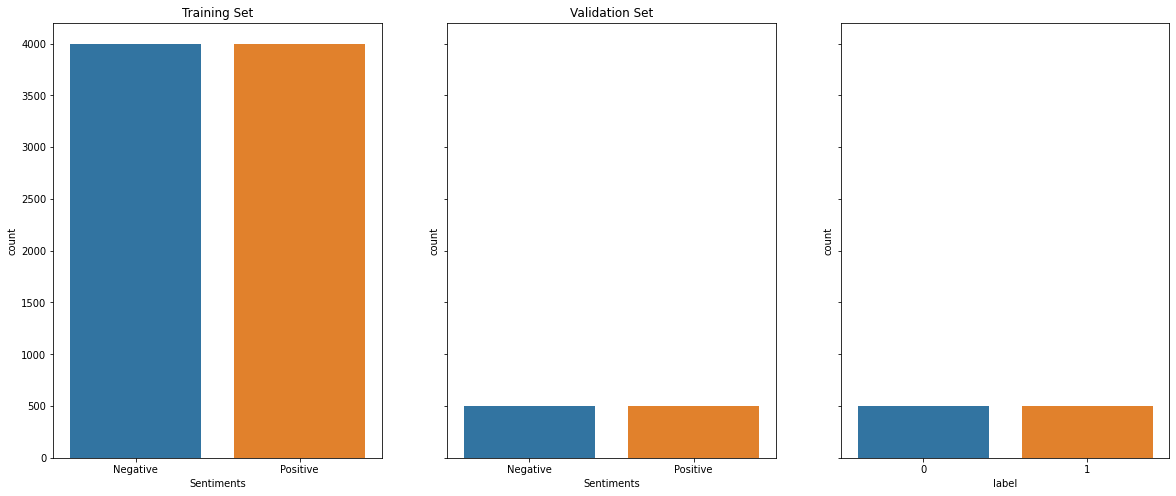

In [ ]:
# let's check if both splits are balanced or not
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,8))
x_labels = ['Negative', 'Positive']
sns.countplot(x = y_train, ax = ax1)
ax1.set_title('Training Set')
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('Sentiments')
sns.countplot(x = y_test, ax = ax2)
ax2.set_title('Test Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
sns.countplot(x = y_val, ax = ax3)
ax2.set_title('Validation Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
plt.show()

# Text Pre-Processing

In [ ]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Word Clouds

In [ ]:
# let's checkput the word cloud of the tweets we have
from wordcloud import WordCloud
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(ttr_data['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

In [ ]:
# let's check the word cloud of negative tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 0]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in negative tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

In [ ]:
# let's check the word cloud of positive tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 1]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# TF-IDF Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X

In [ ]:
X_train

,text,language
4967,Tb to the day I felt like a freaking bomb ass ...,en
8516,Enjoy the day #HappyVeteransday https://t.co/B...,en
6486,I'm so proud of you. I love you @camilacabello...,en
2344,Even water pumps in Arhab poor villagers relay...,en
5322,Happy birthday to my best friend and my person...,en
...,...,...
1907,When your #boss wants you to #suck another guy...,en
4927,"@MartinSFP I'm sorry, Martin. https://t.co/cE7...",en
4511,Ol' cranky has done well. https://t.co/yEasuO7yX8,en
9408,Happy birthday pretty girl ily!💗 https://t.co/...,en


In [ ]:
Vectorizer = TfidfVectorizer(analyzer = PreProcessor)
Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
X_train = Vectorize(X_train['text'], Fitted_Vectorizer)

In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']

In [ ]:
len(english_words)

2761

In [ ]:
X_train = X_train[english_words]

In [ ]:
X_train

,abcnetwork,abducted,abort,aborted,abortion,abpmarathon,absolutely,accessory,accomplished,account,...,yixinginc,yorkshireis,youarehere,youlivewecare,youngvisionar,younow,yousometimes,youth,youthful,youthweeks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_val = Vectorize(X_val['text'], Fitted_Vectorizer)

In [ ]:
X_val = X_val[english_words]

In [ ]:
X_val

,abcnetwork,abducted,abort,aborted,abortion,abpmarathon,absolutely,accessory,accomplished,account,...,yixinginc,yorkshireis,youarehere,youlivewecare,youngvisionar,younow,yousometimes,youth,youthful,youthweeks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Search for an Optimum Model

In [ ]:
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1

pca = PCA()

kNN = KNeighborsClassifier()
kNN_param_grid = {'pca__n_components': [500, 1500],
                  'kNN__n_neighbors': [3, 5, 7], 
                  'kNN__p': [1, 2]}

lr = LogisticRegression(random_state = 4, max_iter = 1000)
lr_param_grid = {'pca__n_components': [500, 1500],
                 'lr__C': [0.1, 0.5, 1, 5], 
                 'lr__solver': ['newton-cg','lbfgs','liblinear','sag']}

svc = SVC(random_state = 4)
svc_param_grid = {'pca__n_components': [500, 1500],
                  'svc__C': [0.1, 0.5, 1, 5], 
                  'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
                  'svc__degree': [2,3,4]}

xgb = XGBClassifier(random_state = 4)
xgb_param_grid = {'pca__n_components': [500, 1500], 
                  'xgb__max_depth': [10, 20, 50],
                  'xgb__n_estimators': [50, 100]}

dtr = DecisionTreeClassifier(random_state = 4)
dtr_param_grid = {'pca__n_components': [500, 1500],
                  'dtr__criterion': ['gini', 'entropy', 'log_loss'], 
                  'dtr__max_depth': [10, 20, 50]}

rf = RandomForestClassifier(random_state = 4)
rf_param_grid = {'pca__n_components': [500, 1500],
                 'rf__n_estimators': [50, 100],
                 'rf__criterion': ['gini', 'entropy', 'log_loss'],
                 'rf__max_depth': [10, 20, 50]}

mlp = MLPClassifier(random_state = 4, max_iter = 1000)
mlp_param_grid = {'pca__n_components': [500, 1500],
                  'mlp__hidden_layer_sizes': [[100, 50], [50, 50]],
                  'mlp__activation': ['logistic', 'tanh', 'relu']}


models_dict = {'kNN': (kNN, kNN_param_grid),
               'lr': (lr, lr_param_grid),
               'svc': (svc, svc_param_grid),
               'xgb': (xgb, xgb_param_grid),
               'dtr': (dtr, dtr_param_grid),
               'rf': (rf, rf_param_grid),
               'mnb': (mnb, mnb_param_grid),
               'mlp': (mlp, mlp_param_grid)}

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

    best_model = results.best_estimator_
    best_model.fit(X_train, y_train.values.ravel())
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)   
    print("model training score: %.3f" % f1_score(y_train.values, y_train_pred))
    print("model vaidation score: %.3f" % f1_score(y_val.values, y_val_pred))

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('kNN', kNN)])
gridsearch = GridSearchCV(pipe, kNN_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'kNN__n_neighbors': 7, 'kNN__p': 2, 'pca__n_components': 500}

0.667 (+/-0.024) for {'kNN__n_neighbors': 3, 'kNN__p': 1, 'pca__n_components': 500}
0.581 (+/-0.156) for {'kNN__n_neighbors': 3, 'kNN__p': 1, 'pca__n_components': 1500}
0.585 (+/-0.136) for {'kNN__n_neighbors': 3, 'kNN__p': 2, 'pca__n_components': 500}
0.636 (+/-0.097) for {'kNN__n_neighbors': 3, 'kNN__p': 2, 'pca__n_components': 1500}
0.642 (+/-0.122) for {'kNN__n_neighbors': 5, 'kNN__p': 1, 'pca__n_components': 500}
0.609 (+/-0.139) for {'kNN__n_neighbors': 5, 'kNN__p': 1, 'pca__n_components': 1500}
0.65 (+/-0.098) for {'kNN__n_neighbors': 5, 'kNN__p': 2, 'pca__n_components': 500}
0.562 (+/-0.107) for {'kNN__n_neighbors': 5, 'kNN__p': 2, 'pca__n_components': 1500}
0.645 (+/-0.123) for {'kNN__n_neighbors': 7, 'kNN__p': 1, 'pca__n_components': 500}
0.591 (+/-0.141) for {'kNN__n_neighbors': 7, 'kNN__p': 1, 'pca__n_components': 1500}
0.676 (+/-0.02) for {'kNN__n_neighbors': 7, 'kNN__p': 2, 'pca__n_components': 5

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('lr', lr)])
gridsearch = GridSearchCV(pipe, lr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'lr__C': 5, 'lr__solver': 'newton-cg', 'pca__n_components': 1500}

0.489 (+/-0.036) for {'lr__C': 0.1, 'lr__solver': 'newton-cg', 'pca__n_components': 500}
0.492 (+/-0.034) for {'lr__C': 0.1, 'lr__solver': 'newton-cg', 'pca__n_components': 1500}
0.489 (+/-0.032) for {'lr__C': 0.1, 'lr__solver': 'lbfgs', 'pca__n_components': 500}
0.493 (+/-0.034) for {'lr__C': 0.1, 'lr__solver': 'lbfgs', 'pca__n_components': 1500}
0.489 (+/-0.037) for {'lr__C': 0.1, 'lr__solver': 'liblinear', 'pca__n_components': 500}
0.493 (+/-0.034) for {'lr__C': 0.1, 'lr__solver': 'liblinear', 'pca__n_components': 1500}
0.487 (+/-0.032) for {'lr__C': 0.1, 'lr__solver': 'sag', 'pca__n_components': 500}
0.492 (+/-0.029) for {'lr__C': 0.1, 'lr__solver': 'sag', 'pca__n_components': 1500}
0.511 (+/-0.038) for {'lr__C': 0.5, 'lr__solver': 'newton-cg', 'pca__n_components': 500}
0.519 (+/-0.024) for {'lr__C': 0.5, 'lr__solver': 'newton-cg', 'pca__n_components': 1500}
0.51 (+/-0.034) for {'lr__C': 0.5, 'lr__solv

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('svc', svc)])
gridsearch = GridSearchCV(pipe, svc_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'pca__n_components': 1500, 'svc__C': 5, 'svc__degree': 3, 'svc__kernel': 'linear'}

0.295 (+/-0.018) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'linear'}
0.453 (+/-0.044) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'poly'}
0.329 (+/-0.025) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'rbf'}
0.421 (+/-0.042) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'sigmoid'}
nan (+/-nan) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'precomputed'}
0.295 (+/-0.017) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 3, 'svc__kernel': 'linear'}
0.422 (+/-0.029) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 3, 'svc__kernel': 'poly'}
0.329 (+/-0.026) for {'pca__n_components': 500, 'svc__C': 0.1, 'svc__degree': 3, 'svc__kernel': 'rbf'}
0.42 (+/-0.039) for {'pca__n_components': 500, 'svc__C': 0.1, 

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('xgb', xgb)])
gridsearch = GridSearchCV(pipe, xgb_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

KeyboardInterrupt: ignored

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('dtr', dtr)])
gridsearch = GridSearchCV(pipe, dtr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'dtr__criterion': 'entropy', 'dtr__max_depth': 50, 'pca__n_components': 500}

0.473 (+/-0.021) for {'dtr__criterion': 'gini', 'dtr__max_depth': 10, 'pca__n_components': 500}
0.45 (+/-0.032) for {'dtr__criterion': 'gini', 'dtr__max_depth': 10, 'pca__n_components': 1500}
0.536 (+/-0.112) for {'dtr__criterion': 'gini', 'dtr__max_depth': 20, 'pca__n_components': 500}
0.493 (+/-0.011) for {'dtr__criterion': 'gini', 'dtr__max_depth': 20, 'pca__n_components': 1500}
0.566 (+/-0.145) for {'dtr__criterion': 'gini', 'dtr__max_depth': 50, 'pca__n_components': 500}
0.549 (+/-0.136) for {'dtr__criterion': 'gini', 'dtr__max_depth': 50, 'pca__n_components': 1500}
0.433 (+/-0.067) for {'dtr__criterion': 'entropy', 'dtr__max_depth': 10, 'pca__n_components': 500}
0.468 (+/-0.052) for {'dtr__criterion': 'entropy', 'dtr__max_depth': 10, 'pca__n_components': 1500}
0.504 (+/-0.032) for {'dtr__criterion': 'entropy', 'dtr__max_depth': 20, 'pca__n_components': 500}
0.486 (+/-0.041) for {'dtr__crit

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('rf', rf)])
gridsearch = GridSearchCV(pipe, rf_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__n_estimators': 50}

0.683 (+/-0.016) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__n_estimators': 50}
0.595 (+/-0.152) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__n_estimators': 100}
0.654 (+/-0.122) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__n_estimators': 50}
0.625 (+/-0.158) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__n_estimators': 100}
0.683 (+/-0.019) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 50, 'rf__n_estimators': 50}
0.637 (+/-0.134) for {'pca__n_components': 500, 'rf__criterion': 'gini', 'rf__max_depth': 50, 'rf__n_estimators': 100}
0.619 (+/-0.16) for {'pca__n_components': 500, 'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__n_estimators': 50}
0.531 (+/-0.021) for {'pca__n_components': 500, 'rf__crite

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                       ('mlp', mlp)])
gridsearch = GridSearchCV(pipe, mlp_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

BEST PARAMS: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': [100, 50], 'pca__n_components': 1500}

0.633 (+/-0.152) for {'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': [100, 50], 'pca__n_components': 500}
0.608 (+/-0.152) for {'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': [100, 50], 'pca__n_components': 1500}
0.602 (+/-0.163) for {'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': [50, 50], 'pca__n_components': 500}
0.584 (+/-0.12) for {'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': [50, 50], 'pca__n_components': 1500}
0.638 (+/-0.15) for {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': [100, 50], 'pca__n_components': 500}
0.603 (+/-0.16) for {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': [100, 50], 'pca__n_components': 1500}
0.549 (+/-0.032) for {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': [50, 50], 'pca__n_components': 500}
0.643 (+/-0.151) for {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': [50, 50], 'pc